## SPAM & NUM_CHAR

In [2]:
# Load packages
library(dplyr)
library(ggplot2)
library(openintro)

In [3]:
# Compute summary statistics
email %>%
  group_by(spam) %>%
  summarize(median(num_char), IQR(num_char))

spam,median(num_char),IQR(num_char)
0,6.831,13.58225
1,1.046,2.81800


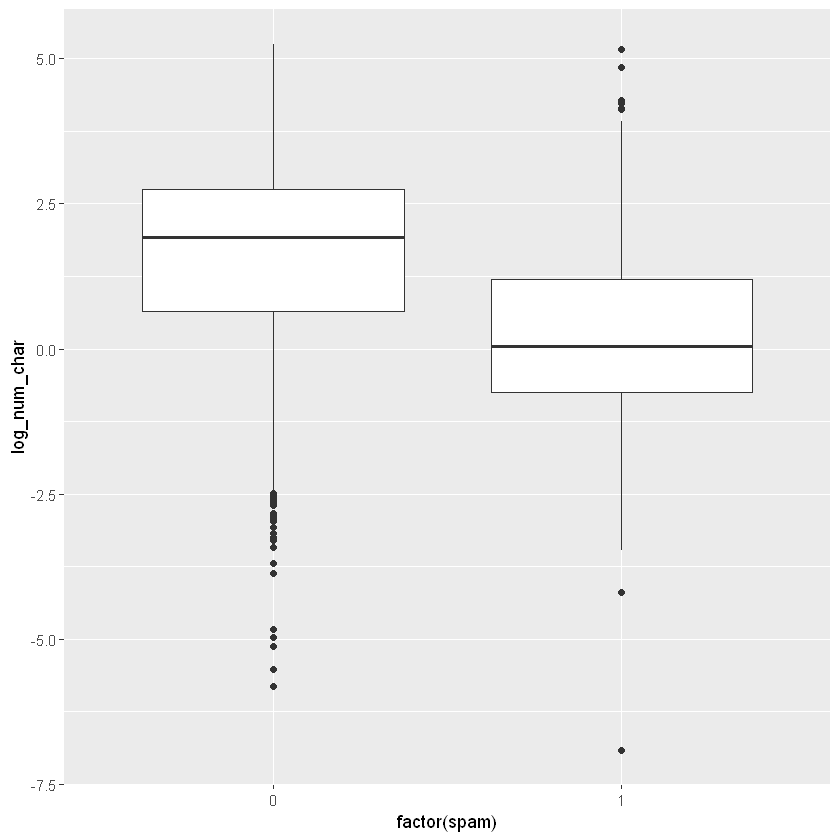

In [5]:
# Create plot
email %>%
  mutate(log_num_char = log(num_char)) %>%
  ggplot(aes(x = factor(spam), y = log_num_char)) +
  geom_boxplot()

=> The median length of not-spam emails is greater than that of spam emails.

## SPAM AND !!!

exclaim_mess = number of exclamation marks in each message

In [6]:
# Compute center and spread for exclaim_mess by spam
email %>%
  group_by(spam) %>%
  summarize(median(exclaim_mess), IQR(exclaim_mess))

spam,median(exclaim_mess),IQR(exclaim_mess)
0,1,5
1,0,1


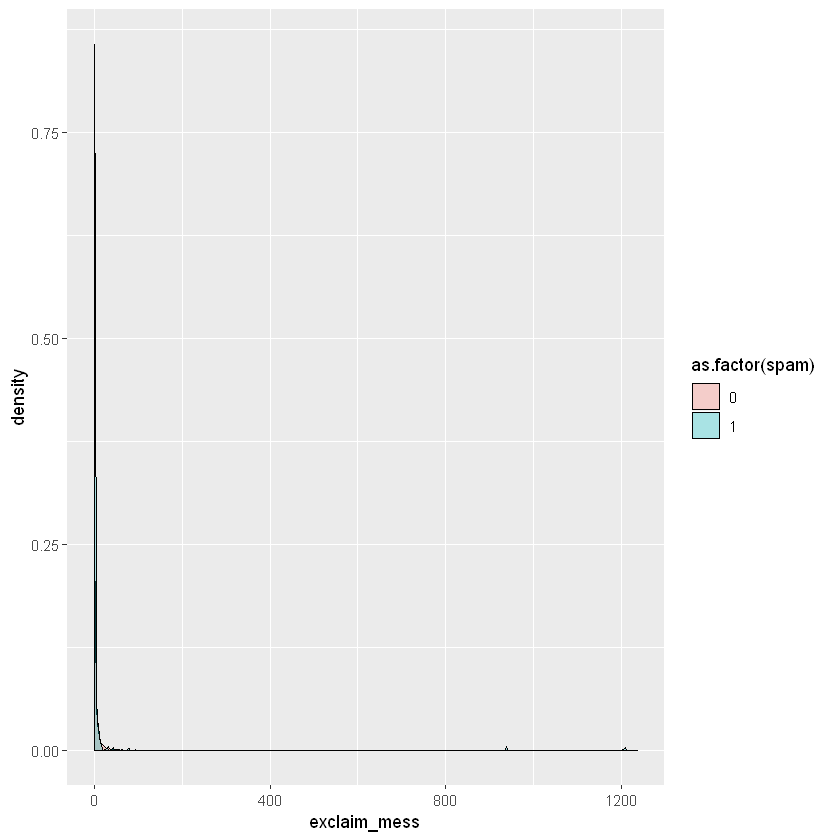

In [7]:
# Create plot for spam and exclaim_mess
email %>%
  ggplot(aes(x = exclaim_mess, fill = as.factor(spam))) +
  geom_density(alpha = 0.3)

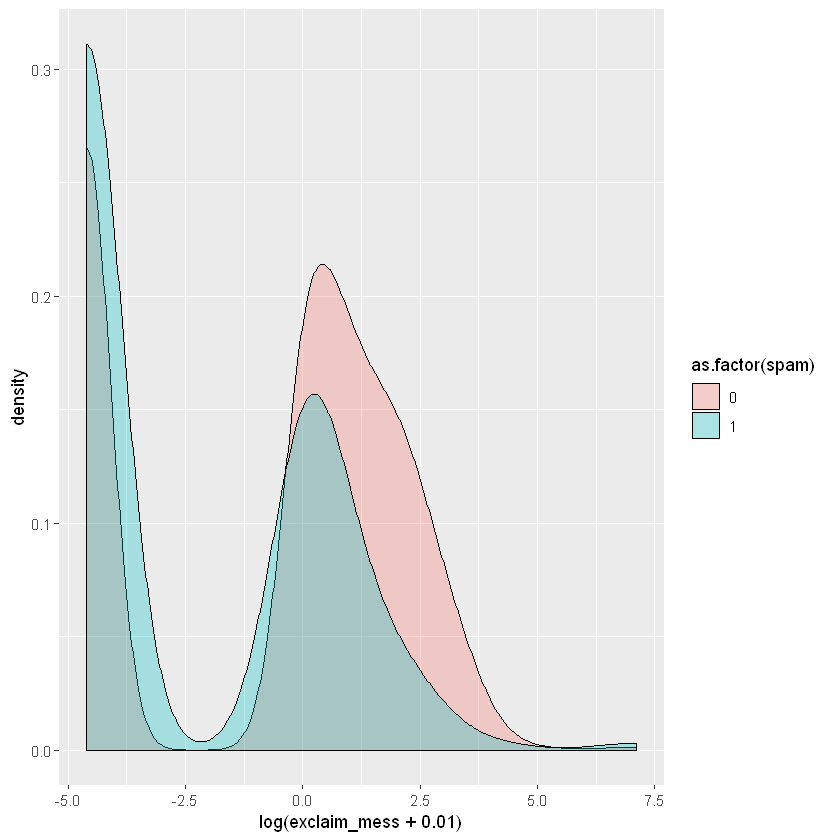

In [8]:
email %>%
  ggplot(aes(x = log(exclaim_mess + .01), fill = as.factor(spam))) +
  geom_density(alpha = 0.3) # log(0) = -Inf => add .01

## COLLAPSE LEVEL

In [9]:
table(email$image) # => should be collapsed into categorical variables


   0    1    2    3    4    5    9   20 
3811   76   17   11    2    2    1    1 

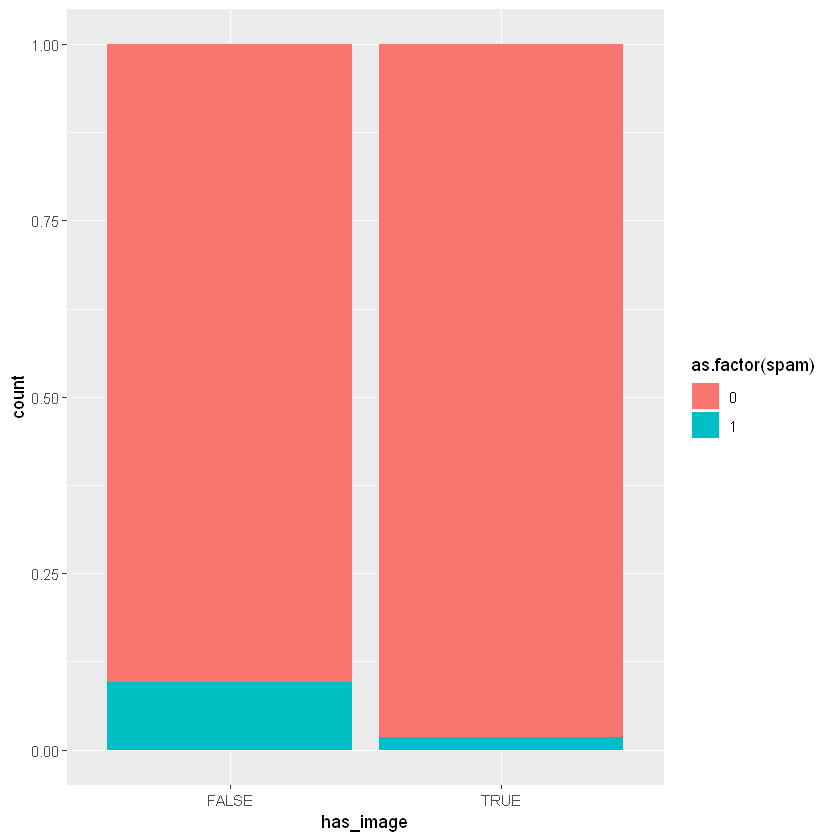

In [10]:
# Create plot of proportion of spam by image
email %>%
  mutate(has_image = image != 0) %>%
  ggplot(aes(x = has_image, fill = as.factor(spam))) +
  geom_bar(position = "fill")

=> An email without an image is more likely to be not-spam than spam.

## DATA INTEGRITY

In [11]:
sum(email$num_char < 0) # => good data

[1] 0

In [12]:
# Test if images count as attachments
sum(email$image > email$attach)

[1] 0

=> images are counted as attachments

## WHAT'S IN A NUMBER?

In [14]:
# Reorder levels
email$number <- factor(email$number,
                       levels = c("none", "small", "big"))

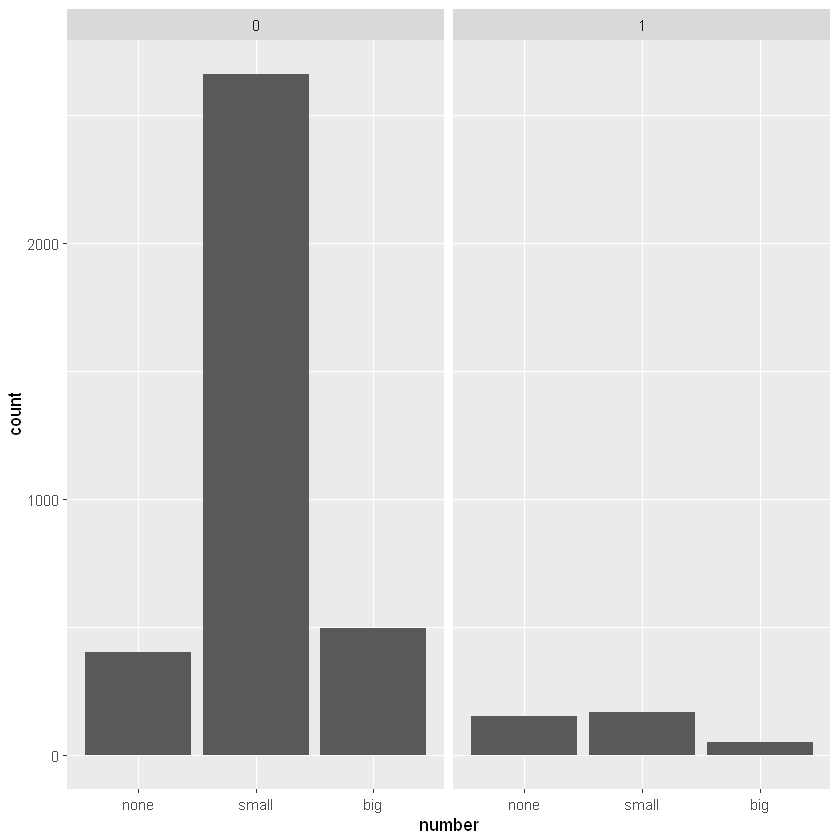

In [15]:
# Construct plot of number
ggplot(email, aes(x = number)) +
  geom_bar() +
  facet_wrap(~spam)